In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from joblib import dump
import time
import matplotlib.pyplot as plt

In [2]:
# Read the datasets
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')

In [3]:
# Set parameters
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.1, 1, 10], 'degree':[2,3,4]}

In [4]:
# Optimise the hyperparameters by grid search
svc = SVC(random_state=0)
gs = GridSearchCV(svc, parameters, cv=10, refit=True)

start = time.time()

gs.fit(x_train, y_train.values.ravel())

end = time.time()

In [5]:
print(f"Runtime of the program is {end - start}")

Runtime of the program is 1.4008429050445557


In [6]:
# See the best score and the parameters
print(gs.best_score_, gs.best_params_)

0.8521666666666666 {'C': 0.1, 'degree': 3, 'kernel': 'poly'}


In [7]:
# See the score of the best model on the train set
gs.score(x_train,y_train)

0.8842975206611571

In [8]:
# Save the optimised model as a file
dump(gs, 'SVM_optimised.joblib')

['SVM_optimised.joblib']

In [9]:
# Visualise the results of Cross Validation
results = pd.DataFrame(gs.cv_results_)
results = results[['param_C','param_degree','param_kernel','mean_test_score']]
results.columns = ['C','degree','kernel','score']
results

,C,degree,kernel,score
0,0.1,2,linear,0.843667
1,0.1,2,rbf,0.827167
2,0.1,2,poly,0.835500
3,0.1,3,linear,0.843667
4,0.1,3,rbf,0.827167
5,0.1,3,poly,0.852167
6,0.1,4,linear,0.843667
7,0.1,4,rbf,0.827167
8,0.1,4,poly,0.839500
9,1,2,linear,0.823000


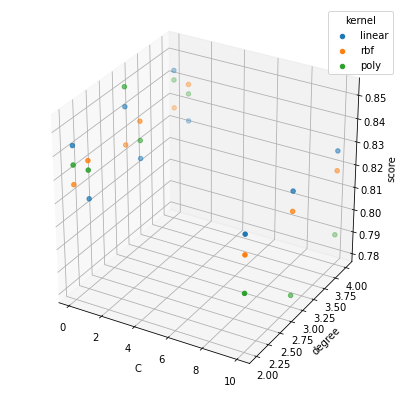

In [10]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
for kernel in ['linear','rbf','poly']:
    result = results[results['kernel']==kernel]
    ax.scatter3D(result['C'],result['degree'],result['score'],label=kernel)
ax.legend(title='kernel')
ax.set_xlabel('C')
ax.set_ylabel('degree')
ax.set_zlabel('score')
plt.show()